Source: https://medium.com/intuition/gentle-introduction-of-bayesian-linear-regression-c83da6b0d1f7

In [1]:
import pymc as pm
import pandas as pd
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pytensor.tensor as at

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:

# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt



%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline
import seaborn as sns

# Load libraries

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
     

Python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:12:24) [GCC 11.2.0]
scipy: 1.12.0
numpy: 1.26.4
matplotlib: 3.8.4
pandas: 2.2.2
sklearn: 1.4.2


In [5]:
df = pd.read_csv('speed_dist_data_20231228.csv', header=0)
df = df.dropna()

In [31]:
# Get the number of rows
row_count = len(df)

print(f'The number of rows in the CSV file is: {row_count}')

The number of rows in the CSV file is: 5828669


https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas

In [7]:
df1 = df[['ballCarrierSpeed','toPlayerDistanceToBallCarrier']]

In [11]:
df1 = df1[~df1.duplicated()]
df1 = df1.dropna().astype(float)

columns = df1.columns.values[:-1] 

In [9]:
df1.head(3)

,ballCarrierSpeed,toPlayerDistanceToBallCarrier
1,6.23,11.0136
2,6.23,12.4279
3,6.23,31.5794


In [11]:
df1 = df1[~df1.duplicated()]
df1 = df1.dropna().astype(float)

columns = df1.columns.values[:-1] 

In [15]:
X = df1.ballCarrierSpeed.values
y = df1.toPlayerDistanceToBallCarrier.values

X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('train and test size')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train and test size
(5000932,) (555660,) (5000932,) (555660,)


In [11]:
df1 = df1[~df1.duplicated()]
df1 = df1.dropna().astype(float)

columns = df1.columns.values[:-1] 

In [17]:
X_train = X_train.reshape(-1,1)

In [19]:
test_score_bayesian = pm.Model(coords={"predictors": columns})

with test_score_bayesian:
    # posterior variance
    sigma = pm.HalfNormal("sigma", 25)

    # beta
    beta = pm.Normal("beta", 0, 10, dims="predictors")
    beta0 = pm.Normal("beta0", 0, 10)

    mu = beta0 + at.dot(X_train, beta)
    
    y_hat = pm.Normal("y_hat", mu=mu, sigma=sigma, observed=y_train)

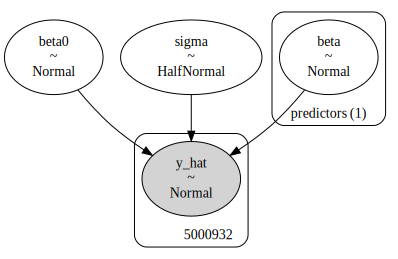

In [27]:
import graphviz
pm.model_to_graphviz(test_score_bayesian)

In [19]:
test_score_bayesian = pm.Model(coords={"predictors": columns})

with test_score_bayesian:
    # posterior variance
    sigma = pm.HalfNormal("sigma", 25)

    # beta
    beta = pm.Normal("beta", 0, 10, dims="predictors")
    beta0 = pm.Normal("beta0", 0, 10)

    mu = beta0 + at.dot(X_train, beta)
    
    y_hat = pm.Normal("y_hat", mu=mu, sigma=sigma, observed=y_train)

In [33]:
with test_score_bayesian:
    sample = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, beta0]


Output()

/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3098: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3098: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:2004: RuntimeWarning: divide by zero encountered in divide
  return x / y
/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/tensor/elemwise.py:753: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:1962: RuntimeWarning: invalid value encountered in scalar subtract
  return x - y
/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3098: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/numpy/core/fromn

ValueError: Not enough samples to build a trace.

In [39]:
# Get the number of rows
row_count = len(df)

print(f'The number of rows in the CSV file is: {row_count}')

The number of rows in the CSV file is: 5828669


In [51]:
# Perform operations on df2
df2 = df.sample(1000)[['ballCarrierSpeed','toPlayerDistanceToBallCarrier']]

In [53]:
df2 = df2[~df2.duplicated()]
df2 = df2.dropna().astype(float)

columns = df2.columns.values[:-1] 

In [59]:
test_score_bayesian = pm.Model(coords={"predictors": columns})

with test_score_bayesian:
    # posterior variance
    sigma = pm.HalfNormal("sigma", 25)

    # beta
    beta = pm.Normal("beta", 0, 10, dims="predictors")
    bet5828669a0 = pm.Normal("beta0", 0, 10)

    mu = beta0 + at.dot(X_train, beta)
    
    y_hat = pm.Normal("y_hat", mu=mu, sigma=sigma, observed=y_train)

In [61]:
X_train = X_train.reshape(-1,1)

In [63]:
with test_score_bayesian:
    sample = pm.sample()

ValueError: Random variables detected in the logp graph: {beta0}.
This can happen when DensityDist logp or Interval transform functions reference nonlocal variables,
or when not all rvs have a corresponding value variable.

In [35]:
az.plot_trace(sample, var_names=["beta0", "sigma"])

NameError: name 'sample' is not defined

Got help below from ChatGPT

In [77]:
X = df1[['ballCarrierSpeed']].values
Y = df1['toPlayerDistanceToBallCarrier'].values

In [79]:
if X.ndim == 1:
    X = X[:, None]

In [59]:
with pm.Model() as test_score_bayesian:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=X.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + pm.math.dot(X, beta)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
with test_score_bayesian:
    sample = pm.sample(init="adapt_diag", return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3098: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3098: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3098: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3098: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ubuntu/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/ubuntu/anaconda3/lib/pyt

ValueError: Not enough samples to build a trace.

In [71]:
df_sampled = df1.sample(1000)  # Smaller subset for ease

In [67]:
# Prepare data
X = df_sampled[['ballCarrierSpeed']].values  # replace with your feature names
Y = df_sampled['toPlayerDistanceToBallCarrier'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Bayesian model
with pm.Model() as test_score_bayesian:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sigma=5)
    beta = pm.Normal('beta', mu=0, sigma=5, shape=X_scaled.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + pm.math.dot(X_scaled, beta)

    # Likelihood
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

    # Sampling
    sample = pm.sample(draws=500, chains=2, tune=500, init="jitter+adapt_diag", return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta, sigma]


Output()

ValueError: Not enough samples to build a trace.

In [73]:
df_sampled_500 = df1.sample(500)  # Smaller subset for ease

In [75]:
# Prepare data
X = df_sampled_500[['ballCarrierSpeed']].values  # replace with your feature names
Y = df_sampled_500['toPlayerDistanceToBallCarrier'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Bayesian model
with pm.Model() as test_score_bayesian:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sigma=5)
    beta = pm.Normal('beta', mu=0, sigma=5, shape=X_scaled.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + pm.math.dot(X_scaled, beta)

    # Likelihood
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

    # Sampling
    sample = pm.sample(draws=500, chains=2, tune=500, init="jitter+adapt_diag", return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta, sigma]


Output()

ValueError: Not enough samples to build a trace.